<a href="https://colab.research.google.com/github/buseozdil/Wtech-Bootcamp/blob/main/Capstone_projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

Bu projede, 1985-2016 yılları arasındaki ülkelerin yaşa, cinsiyete, kuşağa ve gayri safi milli hasılata göre intihar sayılarındaki değişim verilerinin tutulduğu veri setini inceleyeceğiz. Araştırma sorum, intihar oranını etkileyen faktörler nasıl etkiliyor? Bu soruya bağlı olarak birkaç sonuç bulmayı hedefliyorum.


In [ ]:
# Öncelikle ilk 5 satırı görüntületip veri setini tanıyalım.

data = pd.read_csv("master3.csv", delimiter=';', skiprows=0, low_memory=False)
data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
# Son 5 satırı okuyalım

data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,675.0,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,675.0,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,675.0,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,675.0,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,675.0,"63,067,077,179",2309,Boomers


In [ ]:
# Satır ve sütunları kontrol edelim

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
data.axes

[RangeIndex(start=0, stop=27820, step=1),
 Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
        'suicides/100k pop', 'country-year', 'HDI for year',
        ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
       dtype='object')]

In [ ]:
# Sütunların isimlerini düzenleyelim. 

data.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


In [ ]:
# Veri kaç satır ve sütunda oluşuyor buna bakalım.

data.shape

# Veri seti 27819 satır ve 12 sütundan oluşuyor.

(27820, 12)

In [ ]:
# Veri hakkında özet bilgi alalım.

data.info()

# Serinin türü DataFrame'dir.
# HDI for year sütununda boş hücreler olduğunu görüyoruz.
# gdp_for_year ($) değişkenini object'ten float'a çevirmeliyiz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',', '').astype('float')

# 8.değişkenin tipini float'a çevirdik.

In [ ]:
data.info()
# Tekrar özet bilgiye bakalım, type değişmiş mi görelim.
# gdp_for_year ($) değişkenimizin tipi artık float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  float64
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


In [ ]:
#DataFrame içerisinde kaç tane eşsiz değer var bunu görelim.
data.nunique()

country             101
year                 32
sex                   2
age                   6
suicides_no        2084
population        25564
suicides_pop       5298
country-year       2321
HDI_for_year        305
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

In [ ]:
#Veri setindeki toplam NaN değerlere bakalım.
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_pop          0
country-year          0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [ ]:
#NaN değerlerin olduğu değişkenimizin aritmetik ortalamasına(mean) bakalım.
data['HDI_for_year'].mean()

698.1717647058845

In [ ]:
#NaN değerlerin olduğu değişkenimizin ortancasına(medyan) bakalım.

In [ ]:
data['HDI_for_year'].median()

765.0

In [ ]:
#NaN değerlerin olduğu değişkenimizin tepe değerine(mod) bakalım.
data['HDI_for_year'].mode()

0    713.0
1    772.0
2    888.0
dtype: float64

In [ ]:
df = data.copy()

In [ ]:
# HDI_for_year değişkenimizde eksik değerler olduğu için; modla,medyanla veya ortalama ile doldurmayı mantıklı bulmadığımdan bu sütunu silelim.
df.drop('country-year', axis = 1, inplace=True)


# Veri setine tekrar bakalım
df.head()

# Artık analize başlayabiliriz.


,country,year,sex,age,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2.156625e+09,796,Boomers


In [ ]:
# Daha sonra görselleştirmede kullanmak üzere yılları on yıllara göre grupluyorum.

ikibinon = [2016,2015,2014,2013,2012,2011,2010]
ikibin = [2009,2008,2007,2006,2005,2004,2003,2002,2001,2000]
doksanlar = [1999,1998,1997,1996,1995,1994,1993,1992,1991,1990]
seksenler =  [1989,1988,1987,1986]

tenyears = {year: 'ikibinonlar' for year in ikibinon}
tenyears.update({year: 'ikibinler' for year in ikibin})
tenyears.update({year: 'doksanlar' for year in doksanlar})
tenyears.update({year: 'seksenler' for year in seksenler})


df['tenyears'] = df['year'].map(tenyears)

In [ ]:
df.head(20)

,country,year,sex,age,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation,tenyears
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2.156625e+09,796,Generation X,seksenler
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2.156625e+09,796,Silent,seksenler
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2.156625e+09,796,Generation X,seksenler
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2.156625e+09,796,G.I. Generation,seksenler
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2.156625e+09,796,Boomers,seksenler
5,Albania,1987,female,75+ years,1,35600,2.81,NaN,2.156625e+09,796,G.I. Generation,seksenler
6,Albania,1987,female,35-54 years,6,278800,2.15,NaN,2.156625e+09,796,Silent,seksenler
7,Albania,1987,female,25-34 years,4,257200,1.56,NaN,2.156625e+09,796,Boomers,seksenler
8,Albania,1987,male,55-74 years,1,137500,0.73,NaN,2.156625e+09,796,G.I. Generation,seksenler
9,Albania,1987,female,5-14 years,0,311000,0.00,NaN,2.156625e+09,796,Generation X,seksenler


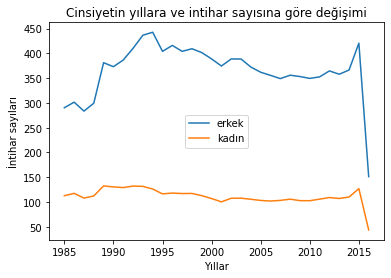

In [ ]:
# İlk olarak cinsiyetin yıllara ve intihar sayısı üzerindeki değişimine bakalım.

df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)


plt.legend(["erkek", 'kadın'], loc=10)
plt.title("Cinsiyetin yıllara ve intihar sayısına göre değişimi")
plt.xlabel("Yıllar")
plt.ylabel("İntihar sayıları")
plt.show()

In [ ]:
# Cinsiyetin intihar sayıları üzerindeki etkisine sütun grafiği ile bakalım.

suicide_age = df[["suicides_no"]].groupby([df["sex"]]).sum()

suicide_age = suicide_age.reset_index()
suicide_age

,sex,suicides_no
0,female,1559510
1,male,5188910


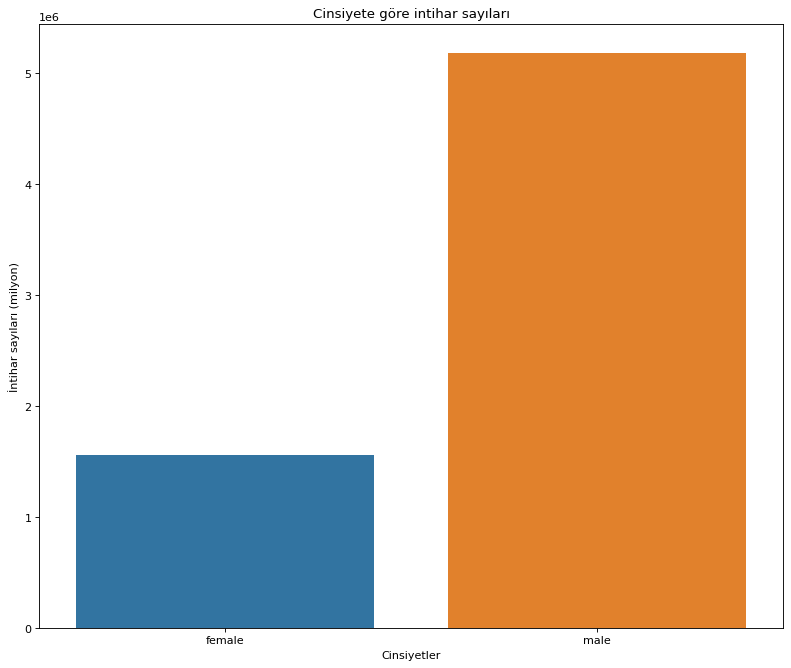

In [ ]:
plt.figure(figsize=(12,10), dpi = 80)

sns.barplot( x= "sex", y = "suicides_no" , data=suicide_age);
plt.title("Cinsiyete göre intihar sayıları")
plt.xlabel("Cinsiyetler")
plt.ylabel("İntihar sayıları (milyon)");

- 1985'ten 2016'ya kadar toplam intihar eden erkek sayısı kadın sayısının yaklaşık 3 katıymış.            

- 1985'ten 2015' kadar artışta olan intihar sayıları 2015'ten sonra düşüşe geçmiş.


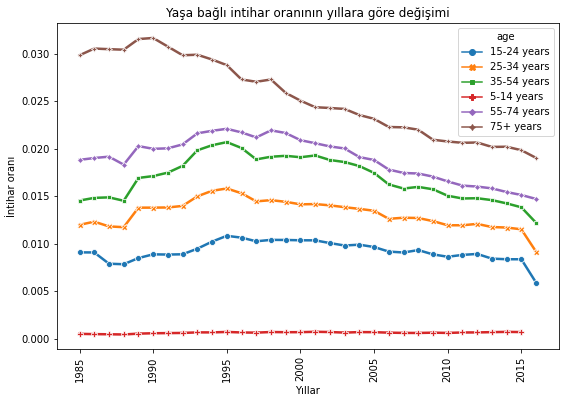

In [ ]:
# Şimdi de yaşlara bakalım.

df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.title("Yaşa bağlı intihar oranının yıllara göre değişimi")
plt.xlabel("Yıllar")
plt.ylabel("İntihar oranı")
plt.show()



- Yaş arttıkça intihar oranı artıyor.
- 1985'ten bu yana genel olarak yaşa bağlı intihar oranlarında bir düşüş olduğunu gözlemleyebiliriz. 
- Yaş intihar üzerinde etkili bir faktördür.

In [ ]:
#Farklı yaş gruplarına göre cinsiyete bağlı intihar oranlarına bir de sütun grafiği ile bakalım.

gender_age = pd.DataFrame(df.groupby(['age', 'sex'])[ 'suicides_no'].sum()).reset_index()
age_order = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']

fig = px.bar(gender_age,
             x = gender_age.age,
             y = gender_age.suicides_no,
             color = 'sex',
             text = gender_age.suicides_no,
             color_discrete_map={'female':'#4C78A8', 'male':'#FFA15A'}
             )

fig.update_layout(height=500, width=650,
                  title = 'Farklı yaş gruplarına göre cinsiyete bağlı intihar oranları',
                  font = dict(color = 'RebeccaPurple')
                  )

fig.update_xaxes(categoryorder='array', categoryarray= age_order, title_text = 'Yaş grupları')
fig.update_yaxes(title_text = 'İntihar sayıları (milyon')
fig.show()

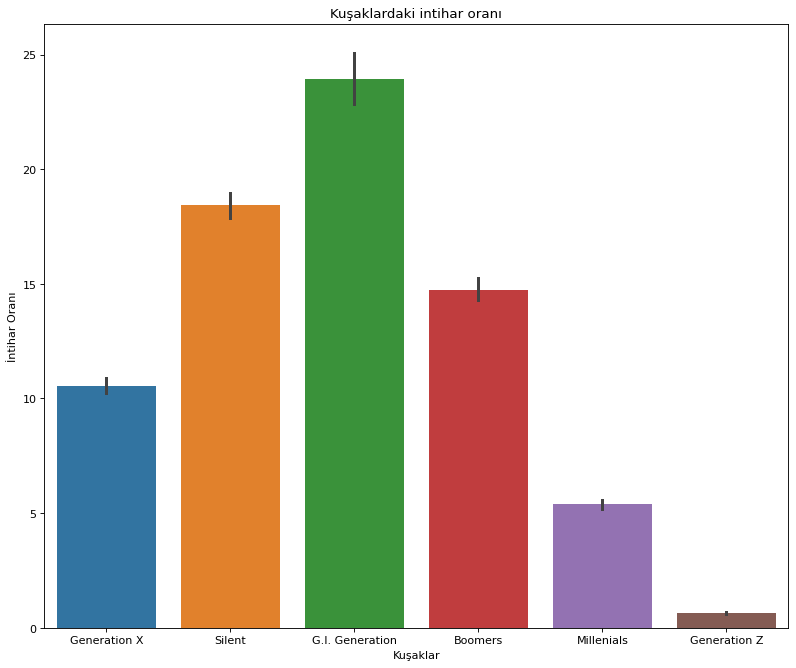

In [ ]:
#Şimdi de kuşaklara göre intihar oranlarına bakalım.

plt.figure(figsize=(12,10), dpi = 80)

sns.barplot( x= "generation", y = "suicides_pop" , data=df);
plt.title("Kuşaklardaki intihar oranı")
plt.xlabel("Kuşaklar")
plt.ylabel("İntihar Oranı");

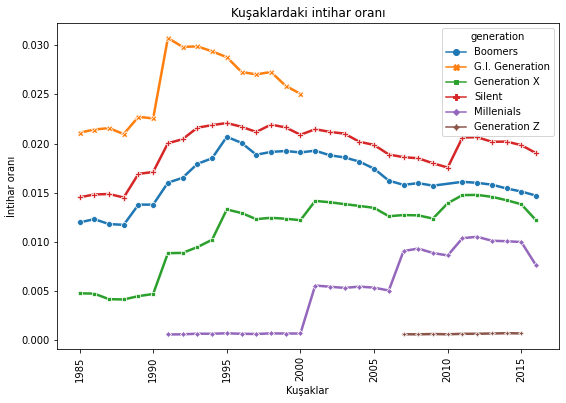

In [ ]:
# Bir de line plot ile bakalım.

df_generation = df.groupby(["year","generation"])["suicides_no", "population"].sum()
df_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "generation",
             data = df_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.title("Kuşaklardaki intihar oranı")
plt.xlabel("Kuşaklar")
plt.ylabel("İntihar oranı")
plt.show()

- G.I kuşağının intihar oranının en yüksek olduğunu görüyoruz. 
- Sessiz kuşakla G.I kuşağının arasında çok büyük bir fark olmadığını da söyleyebiliriz.

In [ ]:
# Ülke sayısına bakalım, ülke listesini düzenleyelim ve ülkelerin intihar oranına bakalım.
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

# Veri setimizde 101 ülke var.

101

In [ ]:
# Her ülkenin intihar oranını çizmeden önce, her yıl için intihar oranını hesaplıyoruz. Sayının ortalamasını oran olarak alıyoruz.

df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

İntihar sayısı en yüksek ülke Rusya'dır.

In [ ]:
countries = df.groupby('country').suicides_no.sum().sort_values(ascending=False).head(63)
countries

country
Russian Federation     1209742
United States          1034013
Japan                   806902
France                  329127
Ukraine                 319950
                        ...   
Estonia                   7034
Costa Rica                6792
Paraguay                  4783
Trinidad and Tobago       4039
Mauritius                 3894
Name: suicides_no, Length: 63, dtype: int64

In [ ]:
countries = pd.DataFrame(countries)
countries = countries.reset_index()

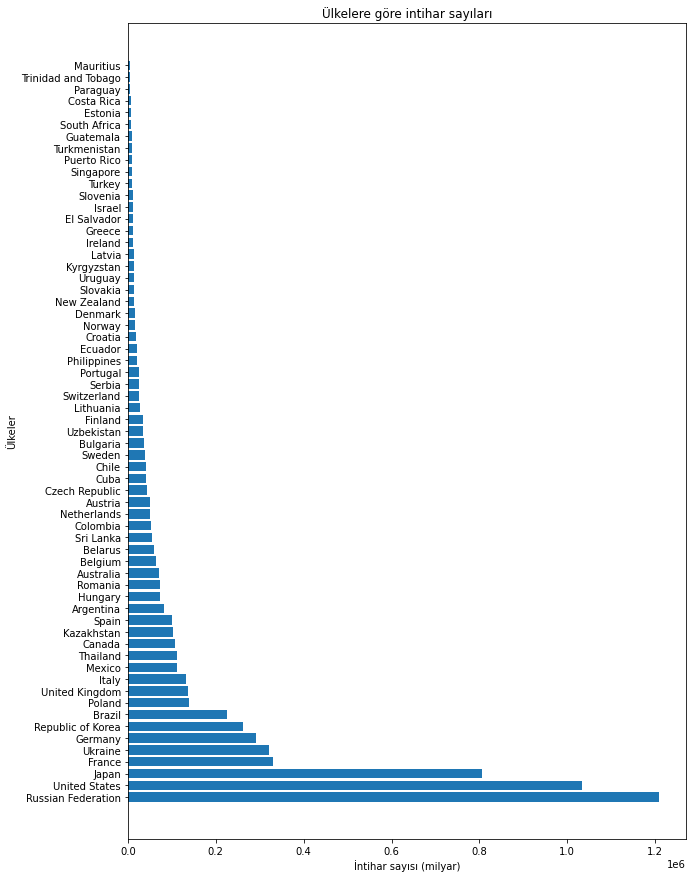

In [ ]:
plt.figure(figsize=(10,15))

plt.barh(countries["country"],countries.suicides_no) 
plt.xlabel("İntihar sayısı (milyar)")
plt.ylabel("Ülkeler")
plt.title("Ülkelere göre intihar sayıları")
plt.show()

In [ ]:
# En yüksek intihar sayısına sahip 20 ülkeyi bulalım
top_country = df.groupby('country').suicides_no.sum().sort_values(ascending=False).head(20)
top_country

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Italy                  132060
Mexico                 111139
Thailand               110643
Canada                 107561
Kazakhstan             101546
Spain                  100202
Argentina               82219
Hungary                 73891
Romania                 72777
Australia               70111
Name: suicides_no, dtype: int64

In [ ]:
top_country = pd.DataFrame(top_country)
top_country = top_country.reset_index()

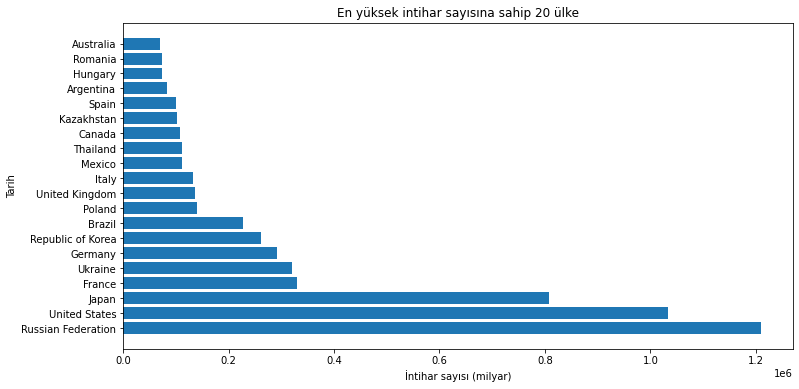

In [ ]:
#En yüksek intihar sayısına sahip 20 ülkeyi görselleştirelim.

plt.figure(figsize=(12,6))

plt.barh(top_country["country"],top_country.suicides_no) 
plt.xlabel("İntihar sayısı (milyar)")
plt.ylabel("Tarih")
plt.title("En yüksek intihar sayısına sahip 20 ülke")
plt.show()

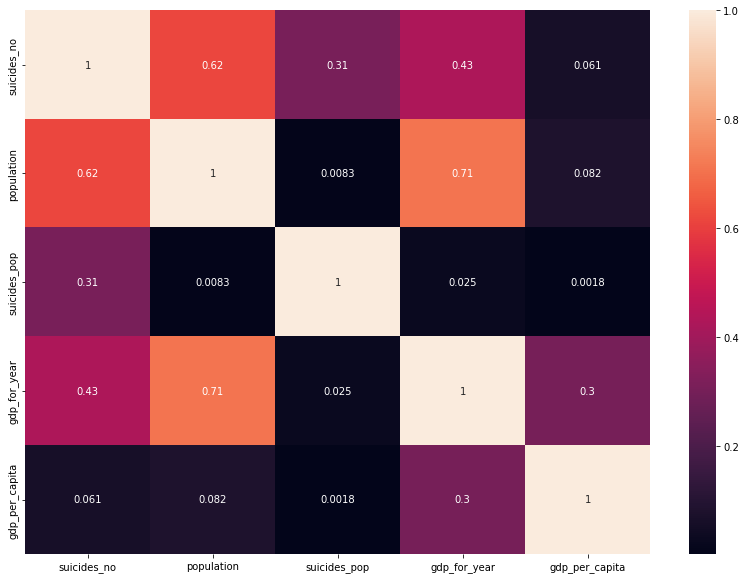

In [ ]:
# Farklı değişkenler arasındaki korelasyona bakıyoruz.
# Korelasyonu görselleştirmek için ısı haritasını kullanmayı seçiyoruz.

col = ['suicides_no','population','suicides_pop','gdp_for_year','gdp_per_capita']
df_corr = df[col].corr()
plt.figure(figsize=(14,10))
sns.heatmap(df_corr,annot=True);

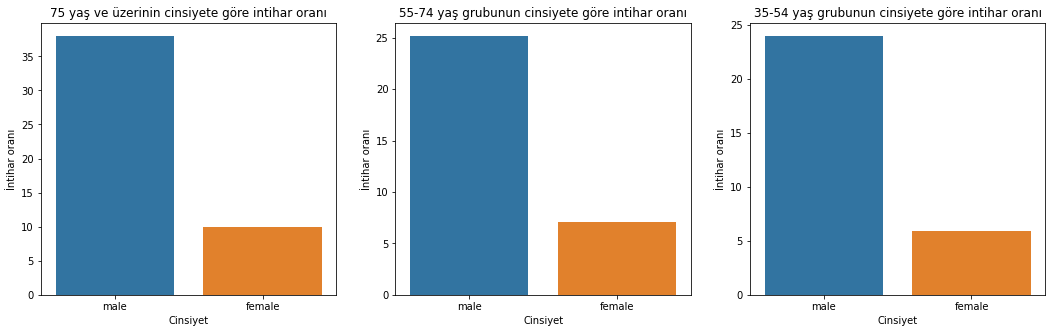

In [ ]:
# Şimdi yaş gruplarına göre ayrı ayrı analiz yapacağım.
# İlk olarak 75 yaş ve üzeri, 55-74 yaş arası ve 35-54 yaş arası insanların cinsiyete göre intihar oranını inceleyelim.
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

df_group = df[df.age == "75+ years"]

sns.barplot(df_group.sex, df.suicides_pop, ci = None)

plt.title("75 yaş ve üzerinin cinsiyete göre intihar oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("İntihar oranı")


plt.subplot(1,3,2)

df_group = df[df.age == "55-74 years"]

sns.barplot(df_group.sex, df.suicides_pop, ci = None)

plt.title("55-74 yaş grubunun cinsiyete göre intihar oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("İntihar oranı")


plt.subplot(1,3,3)

df_group = df[df.age == "35-54 years"]

sns.barplot(df_group.sex, df.suicides_pop, ci = None)

plt.title("35-54 yaş grubunun cinsiyete göre intihar oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("İntihar oranı");


- 54-75 yaş arası insanlardan erkekler kadınlara göre daha çok intihar etmiş.

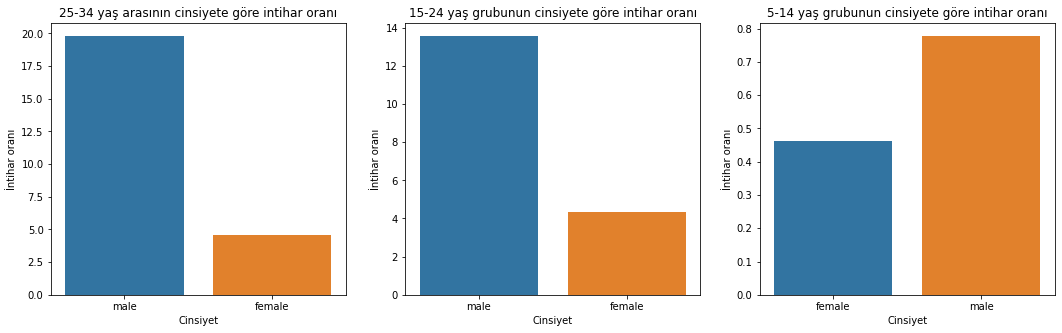

In [ ]:
# Şimdi de 25-34, 15-24 ve 5-14 yaş arası insanların cinsiyete göre intihar oranını inceleyelim.
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

df_group = df[df.age == "25-34 years"]

sns.barplot(df_group.sex, df.suicides_pop, ci = None)

plt.title("25-34 yaş arasının cinsiyete göre intihar oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("İntihar oranı")


plt.subplot(1,3,2)

df_group = df[df.age == "15-24 years"]

sns.barplot(df_group.sex, df.suicides_pop, ci = None)

plt.title("15-24 yaş grubunun cinsiyete göre intihar oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("İntihar oranı")


plt.subplot(1,3,3)

df_group = df[df.age == "5-14 years"]

sns.barplot(df_group.sex, df.suicides_pop, ci = None)

plt.title("5-14 yaş grubunun cinsiyete göre intihar oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("İntihar oranı");

- 15-34 yaş arasında da aynı şekilde, erkeklerde daha çok intihar görülürken, bu durum 5-14 yaş arasında değişmiş.
- 5-14 yaş arasındaki insanlarda kızların intihar oranı erkeklere göre daha fazla.


- 75 yaş ve üzeri insanlarda erkekler kadınlara göre daha fazla intihar ediyormuş.

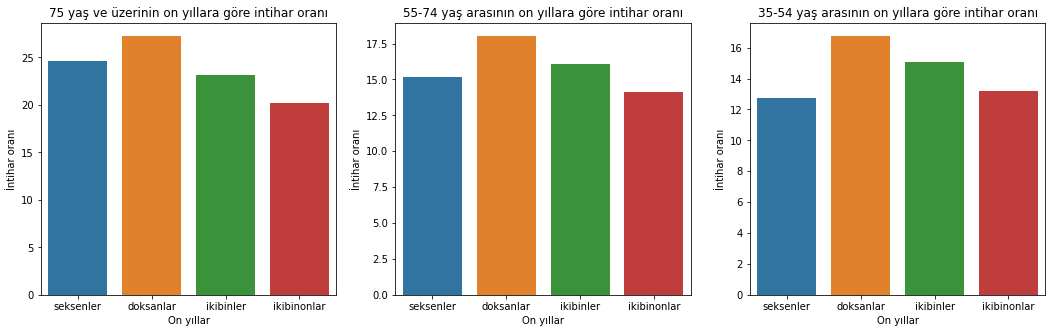

In [ ]:
# Şimdi de bu grupların on yıllara göre intihar oranı değişimine bakalım.

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

df_group = df[df.age == "75+ years"]
sns.barplot(df_group.tenyears, df.suicides_pop, ci = None)

plt.title("75 yaş ve üzerinin on yıllara göre intihar oranı")
plt.xlabel("On yıllar")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,2)

df_group = df[df.age == "55-74 years"]
sns.barplot(df_group.tenyears, df.suicides_pop, ci = None)

plt.title("55-74 yaş arasının on yıllara göre intihar oranı")
plt.xlabel("On yıllar")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,3)

df_group = df[df.age == "35-54 years"]
sns.barplot(df_group.tenyears, df.suicides_pop, ci = None)

plt.title("35-54 yaş arasının on yıllara göre intihar oranı")
plt.xlabel("On yıllar")
plt.ylabel("İntihar oranı");


- Buradan görülüyor ki, 35-75 yaş arası insanlar çoğunlukla doksanlarda intihar etmiş.

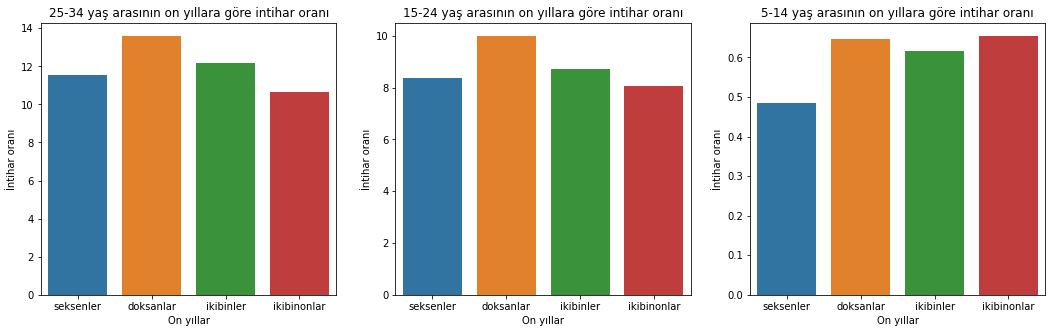

In [ ]:
# Diğer 3 grubun on yıllara göre intihar oranı değişimine bakalım.

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

df_group = df[df.age == "25-34 years"]
sns.barplot(df_group.tenyears, df.suicides_pop, ci = None)

plt.title("25-34 yaş arasının on yıllara göre intihar oranı")
plt.xlabel("On yıllar")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,2)

df_group = df[df.age == "15-24 years"]
sns.barplot(df_group.tenyears, df.suicides_pop, ci = None)

plt.title("15-24 yaş arasının on yıllara göre intihar oranı")
plt.xlabel("On yıllar")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,3)

df_group = df[df.age == "5-14 years"]
sns.barplot(df_group.tenyears, df.suicides_pop, ci = None)

plt.title("5-14 yaş arasının on yıllara göre intihar oranı")
plt.xlabel("On yıllar")
plt.ylabel("İntihar oranı");

- Aynı şekilde 15-34 yaş arası grubun da doksanlarda intihar oranının yüksek olduğu görülmektedir. Ama bu durum 5-14 yaş arası için aynı değildir. 5-14 yaş arası insanlarda 2010'larda intihar oranı en yüksektir.

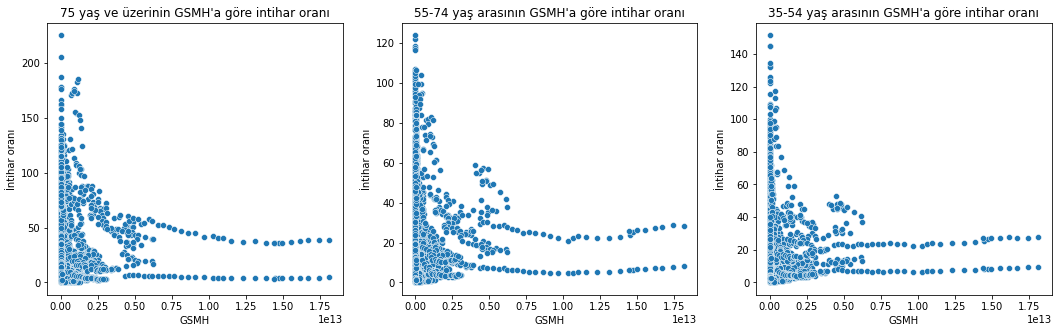

In [ ]:
# Şimdi de yaş gruplarının gayri safi milli hasıla'ya göre intihar oranındaki değişimine bakalım.
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

df_group = df[df.age == "75+ years"]
sns.scatterplot(df_group.gdp_for_year, df.suicides_pop, ci = None)

plt.title("75 yaş ve üzerinin GSMH'a göre intihar oranı")
plt.xlabel("GSMH")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,2)

df_group = df[df.age == "55-74 years"]
sns.scatterplot(df_group.gdp_for_year, df.suicides_pop, ci = None)

plt.title("55-74 yaş arasının GSMH'a göre intihar oranı")
plt.xlabel("GSMH")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,3)

df_group = df[df.age == "35-54 years"]
sns.scatterplot(df_group.gdp_for_year, df.suicides_pop, ci = None)

plt.title("35-54 yaş arasının GSMH'a göre intihar oranı")
plt.xlabel("GSMH")
plt.ylabel("İntihar oranı");

- Bu üç yaş grubundan göreceğimiz üzere, yıllara göre GSMH düştükçe intihar oranı artıyor. Yani maddi faktörün intihar üzerinde büyük bir etkisi var.

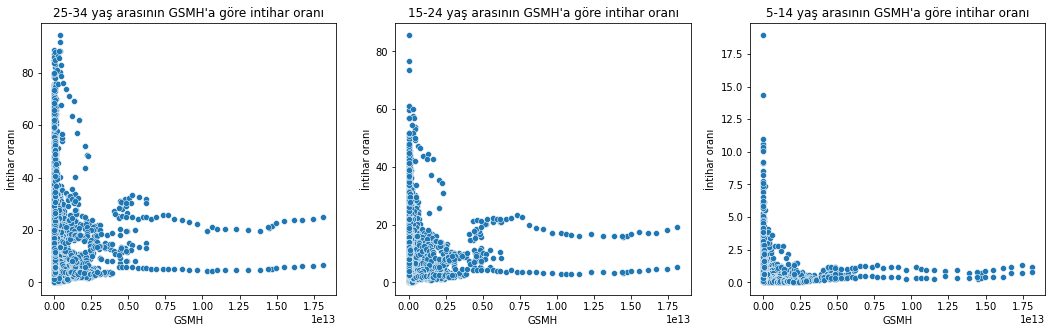

In [ ]:
# Diğer üç yaş grubuna bakalım.

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

df_group = df[df.age == "25-34 years"]
sns.scatterplot(df_group.gdp_for_year, df.suicides_pop, ci = None)

plt.title("25-34 yaş arasının GSMH'a göre intihar oranı")
plt.xlabel("GSMH")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,2)

df_group = df[df.age == "15-24 years"]
sns.scatterplot(df_group.gdp_for_year, df.suicides_pop, ci = None)

plt.title("15-24 yaş arasının GSMH'a göre intihar oranı")
plt.xlabel("GSMH")
plt.ylabel("İntihar oranı")

plt.subplot(1,3,3)

df_group = df[df.age == "5-14 years"]
sns.scatterplot(df_group.gdp_for_year, df.suicides_pop, ci = None)

plt.title("5-14 yaş arasının GSMH'a göre intihar oranı")
plt.xlabel("GSMH")
plt.ylabel("İntihar oranı");

- Aynı şekilde burada da görülüyor ki maddi faktör kötüleştirkçe intihar oranı artıyor.



---




### **SONUÇ**

- Tüm yaş gruplarında intihar sayılarının kadınlara oranla erkeklerde daha fazla. 
- G.I jenerasyonunun intihar oranı daha fazla.
- En fazla intihar oranına sahip ülke Rusya. En çok intihar orada olmuş.
- 5-14 yaş grubu hariç tüm gruplarda doksanlı yıllarda intihar oranı daha fazla. 
- Ve gayri safi milli hasılat düştükçe intihar oranı artıyor. Maddi durum iyileştikçe intihar oranı düşüyor.

## **Teşekkür ederim!**